In [2]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import bqplot as bq

In [3]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [4]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [5]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

------ Endpoint not found - Sleeping for 5 seconds and retrying ------


In [6]:
# Define the updated mapping of places to categories
place_categories = {
    'Venice': 'Large centers',
    'Paris': 'Large centers',
    'Wittenberg': 'Large centers',
    'Antwerp': 'Medium centers',
    'Leipzig': 'Medium centers',
    'Frankfurt (Main)': 'Medium centers',
    'Lyon': 'Medium centers',
    'Cologne': 'Medium centers',
    'London': 'Medium centers',
    'Rome': 'Small centers',
    'Strasbourg': 'Small centers',
    'Seville': 'Small centers',
    'Leiden': 'Small centers',
    'Milan': 'Small centers',
    'Saint Gervais': 'Small centers',
    'Florence': 'Small centers',
    'Kraków': 'Small centers',
    'Salamanca': 'Small centers',
    'Lisbon': 'Small centers',
    'Bologna': 'Small centers',
    'Madrid': 'Small centers',
    'Sine loco': 'Small centers',
    'Basel': 'Small centers',
    'Lemgo': 'Small centers',
    'Dijon': 'Small centers',
    'Valladolid': 'Small centers',
    'Perugia': 'Small centers',
    'Siena': 'One book centers',
    'Avignon': 'One book centers',
    'Vienna': 'One book centers',
    'Ferrara': 'One book centers',
    'Padua': 'One book centers',
    'Nuremberg': 'One book centers',
    'Neustadt an der Weinstraße': 'One book centers',
    'Mexico City': 'One book centers',
    'Mainz': 'One book centers',
    'Coimbra': 'One book centers',
    'Leuven': 'One book centers',
    'Ingolstadt': 'One book centers',
    'Heidelberg': 'One book centers',
    'Geneva': 'One book centers',
    'Dillingen an der Donau': 'One book centers',
    'Alcalá de Henares': 'One book centers'
}

# Ensure 'place' column exists in merged_df and is in the format we expect
df['place'] = df['place'].astype(str)

# Create the 'place_category' column by mapping the 'place' column to categories
df['place_category'] = df['place'].map(place_categories)

# Group by 'place_category' and count the number of unique 'book' values and unique 'place' values in each category
unique_books_and_places_per_category = df.groupby('place_category').agg(
    unique_books_count=('book', 'nunique'),
    unique_places_count=('place', 'nunique')
).reset_index()

# Print the unique place categories, the number of unique books, and the number of unique places
print(unique_books_and_places_per_category)


     place_category  unique_books_count  unique_places_count
0     Large centers                 184                    3
1    Medium centers                  95                    6
2  One book centers                  15                   15
3     Small centers                  48                   18


In [7]:
# Define the city_position dictionary (same as before)
city_position = {
    'Alcalá de Henares': (40.4818396, -3.3644973),
    'Antwerp': (51.2211097, 4.3997081),
    'Augsburg': (48.3690341, 10.8979522),
    'Avignon': (43.9492493, 4.8059012),
    'Basel': (47.5581077, 7.5878261),
    'Bologna': (44.4938203, 11.3426327),
    'Bordeaux': (44.841225, -0.5800364),
    'Coimbra': (40.2111931, -8.4294632),
    'Cologne': (43.7218277, 0.9774958),
    'Dijon': (47.3215806, 5.0414701),
    'Dillingen an der Donau': (48.5812791, 10.4951026),
    'Dortmund': (51.5142273, 7.4652789),
    'Ferrara': (44.8372737, 11.6186451),
    'Florence': (43.7697955, 11.2556404),
    'Frankfurt am Main': (50.1106444, 8.6820917),
    'Frankfurt an der Oder': (52.3412273, 14.549452),
    'Geneva': (46.2047169, 6.1423106290939335),
    'Heidelberg': (49.4093582, 8.694724),
    'Ingolstadt': (48.7630165, 11.4250395),
    'Kraków': (50.0469432, 19.997153435836697),
    'Leiden': (52.1594747, 4.4908843),
    'Leipzig': (51.3406321, 12.3747329),
    'Lemgo': (52.0280674, 8.9012894),
    'Leuven': (50.879202, 4.7011675),
    'Lisbon': (38.7077507, -9.1365919),
    'London': (51.4893335, -0.14405508452768728),
    'Lyon': (45.7578137, 4.8320114),
    'Madrid': (40.4167047, -3.7035825),
    'Mainz': (50.0012314, 8.2762513),
    'Mexico City': (19.4326296, -99.1331785),
    'Milan': (45.4641943, 9.1896346),
    'Neustadt an der Weinstraße': (49.3539802, 8.1350021),
    'Nuremberg': (49.453872, 11.077298),
    'Padua': (45.4077172, 11.8734455),
    'Paris': (48.8534951, 2.3483915),
    'Perugia': (43.1119613, 12.3890104),
    'Pesaro': (43.9098114, 12.9131228),
    'Rome': (41.8933203, 12.4829321),
    'Saint Gervais': (45.2022356, 5.4820229),
    'Salamanca': (40.9651572, -5.6640182),
    'Seville': (37.3886303, -5.9953403),
    'Siena': (43.3185536, 11.3316533),
    'Sine loco': None,
    'Strasbourg': (48.584614, 7.7507127),
    'Tournon': (45.0675156, 4.832852),
    'Tübingen': (48.5236164, 9.0535531),
    'Valladolid': (41.6521328, -4.728562),
    'Venice': (45.4371908, 12.3345898),
    'Vienna': (48.2083537, 16.3725042),
    'Wittenberg': (51.8666527, 12.646761)
}

# Assuming 'merged_df' is your existing DataFrame and has a 'place' column
# Create a function to map the place name to latitude and longitude
def get_coordinates(city):
    return city_position.get(city, (None, None))  # Returns None if city is not found in the dictionary

# Apply the function to create 'latitude' and 'longitude' columns
df[['latitude', 'longitude']] = df['place'].apply(lambda city: pd.Series(get_coordinates(city)))

# Drop rows where 'latitude' or 'longitude' is NaN
#df = df.dropna(subset=['latitude', 'longitude'])

#df

In [8]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [9]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [10]:
# Define the target cks values
target_cks = ['CK_Qualities of the Aristotelian Elements', 
              #'CK_Structure of the Sublunar World', 
              'CK_Symbols of the Elements',
              'CK_Relation Between the Spheres of Water and Earth',
                ]

# Step 1: Filter the DataFrame for rows where 'cks' is in the target_cks list
filtered_df_target_cks = df_exploded[df_exploded['cks'].isin(target_cks)]

# Step 2: Get the unique 'images' values associated with the target cks
images_with_target_cks = filtered_df_target_cks['images'].unique()

# Step 3: Filter the original DataFrame to include all rows that have these images
filtered_df = df_exploded[df_exploded['images'].isin(images_with_target_cks)]

# Display the filtered DataFrame
#filtered_df

In [11]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 202


In [12]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_11 Spheres                                           1
CK_Conical Shape of Planetary Shadow                    4
CK_Earth and Cosmos                                    12
CK_Ecumene Conception                                  16
CK_Lunar Eclipse                                       11
CK_Qualities of the Aristotelian Elements              37
CK_Relation Between the Spheres of Water and Earth    153
CK_Symbols of the Elements                             12
CK_T-O Maps                                             3
CK_Terraqueous Globe                                   11
Name: images, dtype: int64


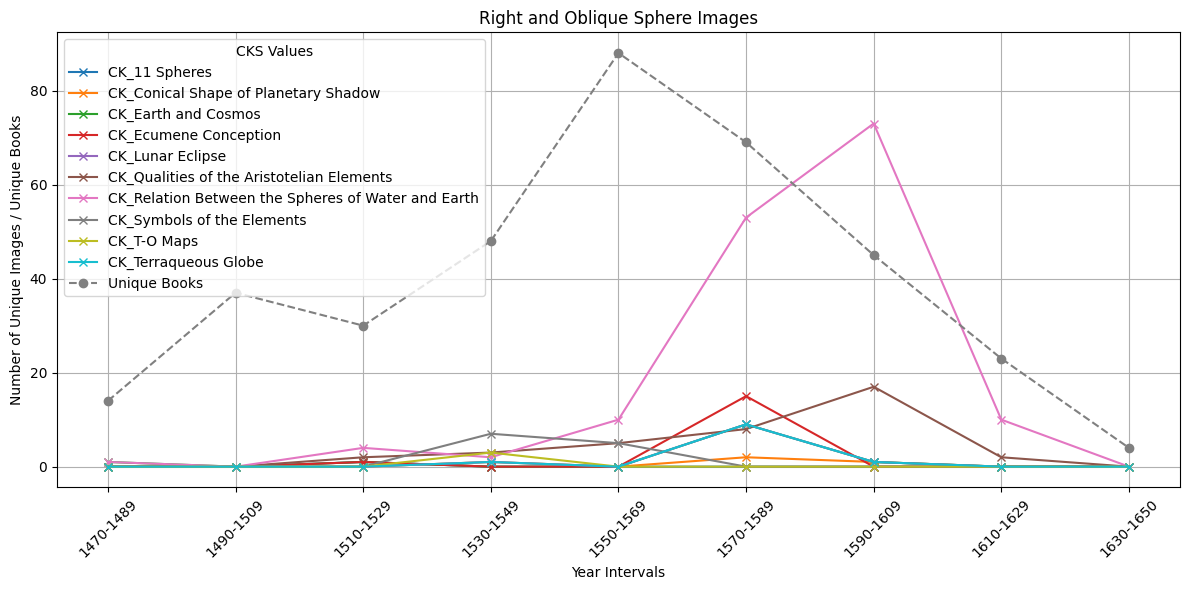

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure filtered_df and books are treated as copies (if required)
filtered_df = filtered_df.copy()
books = books.copy()

# Ensure 'year' columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650'
]

# Add 'interval' column to the filtered_df DataFrame based on custom bins
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add 'interval' column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Step 1: Group by both 'cks' and 'interval' and count unique 'images'
# Add observed=False to prevent the FutureWarning
unique_images_by_cks_interval = filtered_df.groupby(['interval', 'cks'], observed=False)['images'].nunique().unstack(fill_value=0)

# Step 2: Count the total number of unique books by 'interval'
# Add observed=False to prevent the FutureWarning
unique_books_count = books.groupby('interval', observed=False)['book'].nunique()

# Step 3: Plot the results
plt.figure(figsize=(12, 6))

# Plot unique images for each 'cks' value
for cks_value in unique_images_by_cks_interval.columns:
    plt.plot(unique_images_by_cks_interval.index.astype(str), unique_images_by_cks_interval[cks_value].values, 
             label=cks_value, marker='x')

# Plot the number of unique books as a dashed grey line
plt.plot(unique_books_count.index.astype(str), unique_books_count.values, label='Unique Books', marker='o', color='grey', linestyle='--')

# Customize the plot
plt.title('Right and Oblique Sphere Images')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKS Values')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


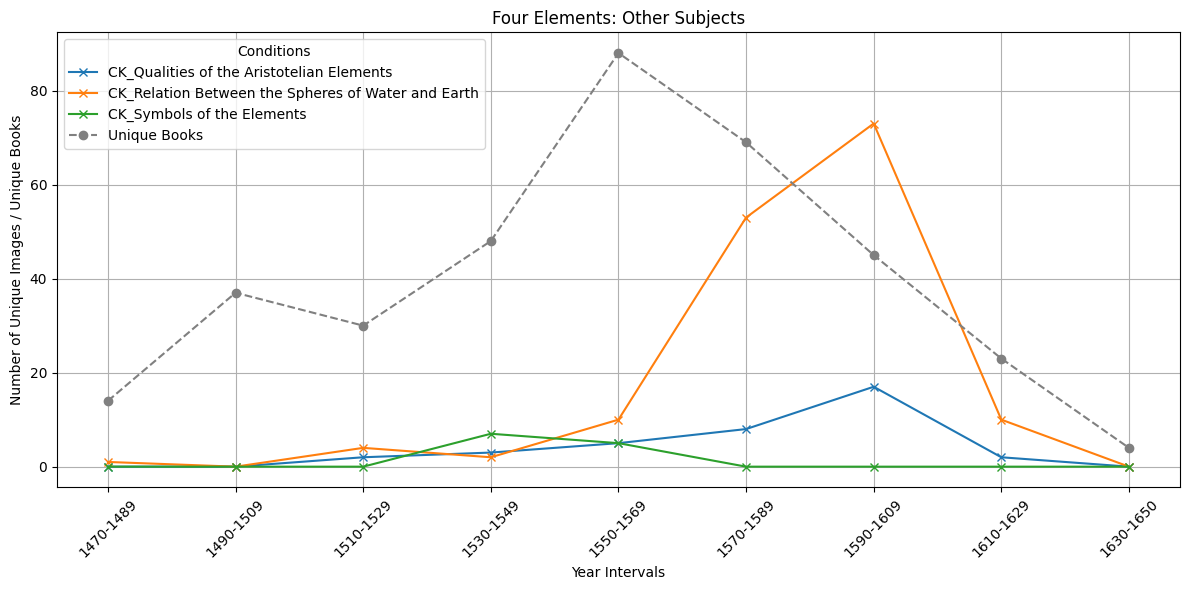

In [14]:
# Ensure filtered_df and books are treated as copies (if required)
filtered_df = filtered_df.copy()
books = books.copy()

# Ensure 'year' columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650'
]

# Add 'interval' column to the filtered_df DataFrame based on custom bins
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add 'interval' column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define the keywords for the 'cks' values
keywords = [#'CK_11 Spheres', 
            #'CK_Conical Shape of Planetary Shadow', 
            #'CK_Earth and Cosmos', 
            #'CK_Ecumene Conception', 
            #'CK_Lunar Eclipse', 
            #'CK_Populated Earth', 
            'CK_Qualities of the Aristotelian Elements', 
            'CK_Relation Between the Spheres of Water and Earth', 
            #'CK_Structure of the Sublunar World', 
            'CK_Symbols of the Elements', 
            #'CK_T-O Maps', 
            #'CK_Terraqueous Globe',
]

# Count unique images by keywords in filtered_df
unique_images_by_keyword = {}
for keyword in keywords:
    condition = filtered_df['cks'].apply(lambda x: keyword in x)
    unique_images_by_keyword[keyword] = filtered_df[condition].groupby('interval', observed=False)['images'].nunique()

# Count the total number of unique images across all `cks` values
total_unique_images = filtered_df.groupby('interval', observed=False)['images'].nunique()

# Count unique books by interval in the books DataFrame
unique_books_count = books.groupby('interval', observed=False)['book'].nunique()

# Step 3: Plot the results
plt.figure(figsize=(12, 6))

# Plot unique images for each keyword
for keyword, unique_images in unique_images_by_keyword.items():
    plt.plot(unique_images.index.astype(str), unique_images.values, label=keyword, marker='x')

# Plot the total unique images as a dashed line
#plt.plot(total_unique_images.index.astype(str), total_unique_images.values, label='Total Unique Images', marker='s', color='black', linestyle='--')

# Plot the number of unique books as a dashed grey line
plt.plot(unique_books_count.index.astype(str), unique_books_count.values, label='Unique Books', marker='o', color='grey', linestyle='--')

# Customize the plot
plt.title('Four Elements: Other Subjects')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Conditions')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# # Assuming filtered_df is your DataFrame
# unique_caluter_names = filtered_df['cluster_name'].unique()

# # Create a new DataFrame from the unique values
# unique_df = pd.DataFrame(unique_caluter_names, columns=['cluster_name'])

# # Save the DataFrame to an Excel file
# unique_df.to_excel('structure of the sublunar world clusters.xlsx', index=False)

In [16]:
# Define the target cks values
target_cks = ['CK_Qualities of the Aristotelian Elements', 
              #'CK_Structure of the Sublunar World', 
              'CK_Symbols of the Elements',
              'CK_Relation Between the Spheres of Water and Earth',
                ]

# Step 1: Filter the DataFrame for rows where 'cks' is in the target_cks list
filtered_df_target_cks = df_exploded[df_exploded['cks'].isin(target_cks)]

# Step 2: Get the unique 'images' values associated with the target cks
images_with_target_cks = filtered_df_target_cks['images'].unique()

# Step 3: Filter the original DataFrame to include all rows that have these images
filtered_df = df_exploded[df_exploded['images'].isin(images_with_target_cks)]

# Display the filtered DataFrame
#filtered_df

In [17]:
path_to_xlsx = 'C:\\Users\\nogas\\Image_data\\VT_1.3_COMPLETEoverwritten_structure of the sublunar world clusters.xlsx'
visual = pd.read_excel(path_to_xlsx)
sublunar_structure_visual = pd.merge(filtered_df, visual, on='cluster_name')
sublunar_structure_visual

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag,place_category,latitude,longitude,decorated,table-like,diagram,3D
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Ferrara,1472,nan,One book centers,44.837274,11.618645,no,no,no,no
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Earth and Cosmos,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Ferrara,1472,nan,One book centers,44.837274,11.618645,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00090,CK_Qualities of the Aristotelian Elements,http://sphaera.mpiwg-berlin.mpg.de/id/item/13e...,1929,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Francesco Capuano's second commentary on the T...,"Content, Annotated",951,Venice,1518,nan,Large centers,45.437191,12.334590,no,yes,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_03413,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/4cd...,1804,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",296,Alcalá de Henares,1526,nan,One book centers,40.481840,-3.364497,no,no,yes,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_03413,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/4cd...,1804,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",411,Alcalá de Henares,1526,nan,One book centers,40.481840,-3.364497,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01944,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,1822,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Lyon,1618,nan,Medium centers,45.757814,4.832011,yes,no,no,yes
257,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01944,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,1822,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Lyon,1618,nan,Medium centers,45.757814,4.832011,yes,no,no,yes
258,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01950,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,1822,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Lyon,1618,nan,Medium centers,45.757814,4.832011,no,no,no,no
259,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01069,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,1822,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Lyon,1618,nan,Medium centers,45.757814,4.832011,no,no,no,yes


In [18]:
# Count unique values in the specified column
unique_count = sublunar_structure_visual['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 202


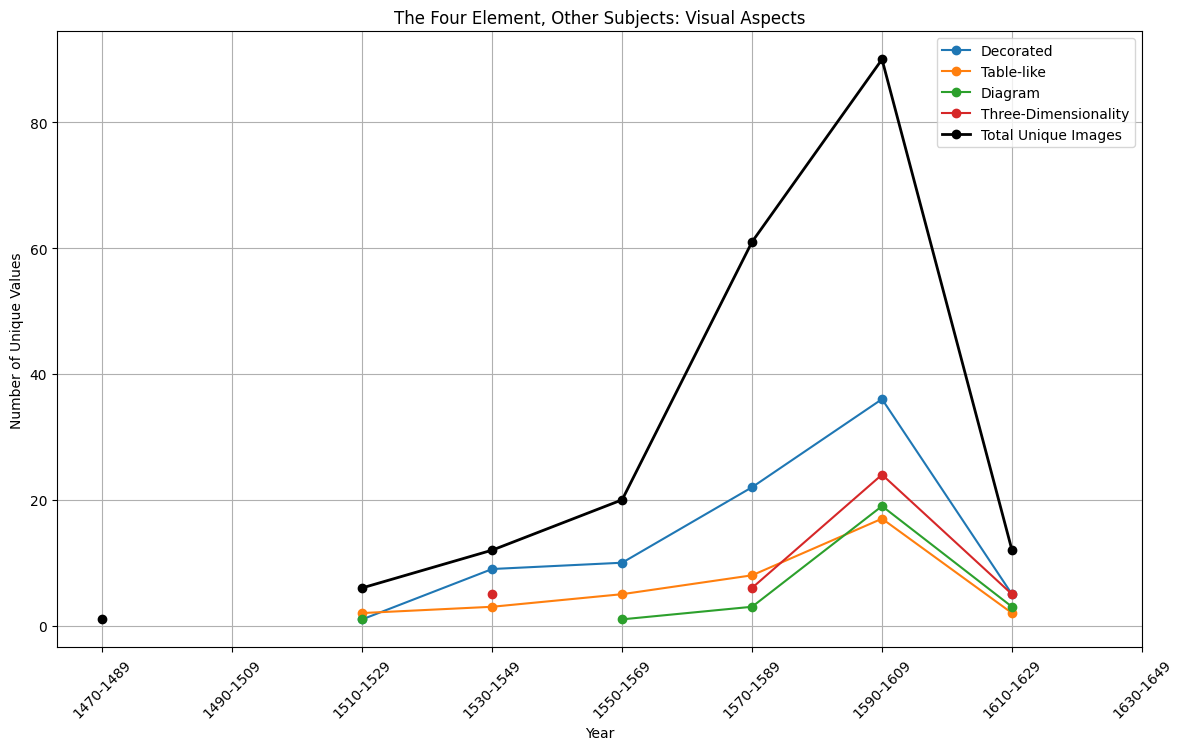

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'year' column is of type int
sublunar_structure_visual['year'] = sublunar_structure_visual['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sublunar_structure_visual['interval'] = pd.cut(sublunar_structure_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter and group data for each category
def count_unique_images_by_column(column_name, value):
    filtered_df = sublunar_structure_visual[sublunar_structure_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=True)['images'].nunique()  # Use observed=True

# Collect data for new columns
decorated_images = count_unique_images_by_column('decorated', 'yes')
table_like_images = count_unique_images_by_column('table-like', 'yes')
diagrams = count_unique_images_by_column('diagram', 'yes')
three_dimensionality_effect = count_unique_images_by_column('3D', 'yes')

# Combine the data for line plots
side_by_side_data_new = pd.DataFrame({
    'Decorated': decorated_images,
    'Table-like': table_like_images,
    'Diagram': diagrams,
    'Three-Dimensionality': three_dimensionality_effect
})

# Ensure 'books' DataFrame is defined and has the correct columns
total_unique_books_df = books.groupby('interval', observed=True)['book'].nunique()  # Use observed=True

# Calculate total number of unique images
total_unique_images = sublunar_structure_visual.groupby('interval', observed=True)['images'].nunique()  # Use observed=True

# Ensure all intervals are present, even if missing data
side_by_side_data_new = side_by_side_data_new.reindex(labels, fill_value=pd.NA)  # Reindex with NaN for missing intervals
total_unique_images = total_unique_images.reindex(labels, fill_value=pd.NA)  # Reindex with NaN for missing intervals
total_unique_books_df = total_unique_books_df.reindex(labels, fill_value=pd.NA)  # Reindex with NaN for missing intervals

# Plot lines for each category
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category from side_by_side_data_new
for column in side_by_side_data_new.columns:
    ax.plot(side_by_side_data_new.index, side_by_side_data_new[column], marker='o', label=column)

# Plot the lines for total unique images and total unique books
ax.plot(total_unique_images.index, total_unique_images.values, marker='o', linestyle='-', color='black', label='Total Unique Images', linewidth=2)
#ax.plot(total_unique_books_df.index, total_unique_books_df.values, marker='o', linestyle='--', color='gray', label='Total Unique Books', linewidth=2)

# Customize the x-axis labels to match the correct order
ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=45)

plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('The Four Element, Other Subjects: Visual Aspects')
plt.legend()
plt.grid(True)
plt.show()


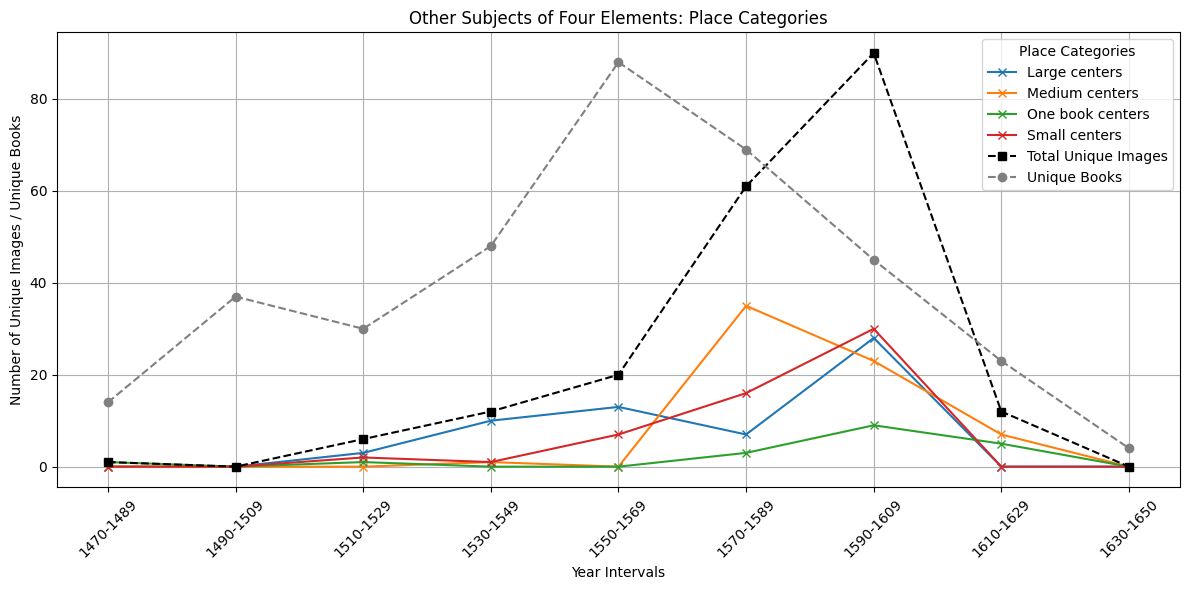

In [22]:
# Ensure filtered_df and books are treated as copies (if required)
sublunar_structure_visual = sublunar_structure_visual.copy()
books = books.copy()

# Ensure 'year' columns are of integer type
sublunar_structure_visual['year'] = sublunar_structure_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650'
]

# Add 'interval' column to the filtered_df DataFrame based on custom bins
sublunar_structure_visual['interval'] = pd.cut(sublunar_structure_visual['year'], bins=bins, labels=labels, right=False)

# Add 'interval' column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images by interval and place_category in filtered_df
unique_images_by_place = sublunar_structure_visual.groupby(['interval', 'place_category'], observed=False)['images'].nunique().unstack(fill_value=0)

# Count the total number of unique images across all place categories for each interval
total_unique_images = sublunar_structure_visual.groupby('interval', observed=False)['images'].nunique()

# Count unique books by interval in the books DataFrame
unique_books_count = books.groupby('interval', observed=False)['book'].nunique()

# Step 3: Plot the results
plt.figure(figsize=(12, 6))

# Plot unique images for each place category
for place_category in unique_images_by_place.columns:
    plt.plot(unique_images_by_place.index.astype(str), unique_images_by_place[place_category], label=place_category, marker='x')

# Plot the total unique images as a dashed line
plt.plot(total_unique_images.index.astype(str), total_unique_images.values, label='Total Unique Images', marker='s', color='black', linestyle='--')

# Plot the number of unique books as a dashed grey line
plt.plot(unique_books_count.index.astype(str), unique_books_count.values, label='Unique Books', marker='o', color='grey', linestyle='--')

# Customize the plot
plt.title('Other Subjects of Four Elements: Place Categories')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Place Categories')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
# Print the number of unique values in the 'images' column
unique_images_count = sublunar_structure_visual['images'].nunique()
print(f"Number of unique 'images' values: {unique_images_count}")

# Print the unique values in the 'cks' column
unique_cks_values = sublunar_structure_visual['cks'].unique()
print("Unique 'cks' values:")
print(unique_cks_values)


Number of unique 'images' values: 202
Unique 'cks' values:
['CK_Relation Between the Spheres of Water and Earth'
 'CK_Earth and Cosmos' 'CK_Qualities of the Aristotelian Elements'
 'CK_T-O Maps' 'CK_Symbols of the Elements' 'CK_Ecumene Conception'
 'CK_Lunar Eclipse' 'CK_Terraqueous Globe' 'CK_11 Spheres'
 'CK_Conical Shape of Planetary Shadow']


In [24]:
# Drop rows where 'latitude' or 'longitude' is NaN
sublunar_structure_visual = sublunar_structure_visual.dropna(subset=['latitude', 'longitude'])

In [25]:
# Print the number of unique values in the 'images' column
unique_images_count = sublunar_structure_visual['images'].nunique()
print(f"Number of unique 'images' values: {unique_images_count}")

# Print the unique values in the 'cks' column
unique_cks_values = sublunar_structure_visual['cks'].unique()
print("Unique 'cks' values:")
print(unique_cks_values)


Number of unique 'images' values: 202
Unique 'cks' values:
['CK_Relation Between the Spheres of Water and Earth'
 'CK_Earth and Cosmos' 'CK_Qualities of the Aristotelian Elements'
 'CK_T-O Maps' 'CK_Symbols of the Elements' 'CK_Ecumene Conception'
 'CK_Lunar Eclipse' 'CK_Terraqueous Globe' 'CK_11 Spheres'
 'CK_Conical Shape of Planetary Shadow']


In [26]:
sublunar_structure_visual

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag,place_category,latitude,longitude,decorated,table-like,diagram,3D,interval
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Ferrara,1472,nan,One book centers,44.837274,11.618645,no,no,no,no,1470-1489
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Earth and Cosmos,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Ferrara,1472,nan,One book centers,44.837274,11.618645,no,no,no,no,1470-1489
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00090,CK_Qualities of the Aristotelian Elements,http://sphaera.mpiwg-berlin.mpg.de/id/item/13e...,1929,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Francesco Capuano's second commentary on the T...,"Content, Annotated",951,Venice,1518,nan,Large centers,45.437191,12.334590,no,yes,no,no,1510-1529
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_03413,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/4cd...,1804,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",296,Alcalá de Henares,1526,nan,One book centers,40.481840,-3.364497,no,no,yes,no,1510-1529
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_03413,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/4cd...,1804,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",411,Alcalá de Henares,1526,nan,One book centers,40.481840,-3.364497,no,no,yes,no,1510-1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01944,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,1822,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Lyon,1618,nan,Medium centers,45.757814,4.832011,yes,no,no,yes,1610-1629
257,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01944,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,1822,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Lyon,1618,nan,Medium centers,45.757814,4.832011,yes,no,no,yes,1610-1629
258,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01950,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,1822,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Lyon,1618,nan,Medium centers,45.757814,4.832011,no,no,no,no,1610-1629
259,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01069,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,1822,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Annotated, Content",295,Lyon,1618,nan,Medium centers,45.757814,4.832011,no,no,no,yes,1610-1629


In [38]:
#creating data frames for plotting: filtered by interval, with colums for ploting

# Step 2: Get unique interval values
unique_intervals = sublunar_structure_visual['interval'].unique()

# Initialize an empty dictionary to store DataFrames by interval
interval_dfs = {}

# Step 3: Iterate through each unique interval and create the corresponding DataFrame
for interval in unique_intervals:
    # Filter the original DataFrame for the current interval
    df_interval = sublunar_structure_visual[sublunar_structure_visual['interval'] == interval].copy()
    
    # Aggregate unique places, their categories, and geographic coordinates
    places_info = df_interval.groupby('place').agg(
        place_category=('place_category', 'first'),
        latitude=('latitude', 'first'),
        longitude=('longitude', 'first')
    ).reset_index()
    
    # Step 4: Add columns for the CK relations
    places_info['CK_Relation Between the Spheres of Water and Earth'] = places_info['place'].apply(
        lambda place: 'yes' if 'CK_Relation Between the Spheres of Water and Earth' in df_interval[df_interval['place'] == place]['cks'].values else 'no'
    )
    
    places_info['CK_Qualities of the Aristotelian Elements'] = places_info['place'].apply(
        lambda place: 'yes' if 'CK_Qualities of the Aristotelian Elements' in df_interval[df_interval['place'] == place]['cks'].values else 'no'
    )
    
    places_info['CK_Symbols of the Elements'] = places_info['place'].apply(
        lambda place: 'yes' if 'CK_Symbols of the Elements' in df_interval[df_interval['place'] == place]['cks'].values else 'no'
    )
    
    # Store the resulting DataFrame in the dictionary
    interval_dfs[interval] = places_info

In [41]:
interval_dfs.keys()

dict_keys(['1470-1489', '1510-1529', '1530-1549', '1570-1589', '1550-1569', '1590-1609', '1610-1629'])

In [62]:
interval_dfs['1570-1589']

,place,place_category,latitude,longitude,CK_Relation Between the Spheres of Water and Earth,CK_Qualities of the Aristotelian Elements,CK_Symbols of the Elements
0,Heidelberg,One book centers,49.409358,8.694724,yes,no,no
1,Lyon,Medium centers,45.757814,4.832011,yes,yes,no
2,Rome,Small centers,41.893320,12.482932,yes,yes,no
3,Venice,Large centers,45.437191,12.334590,no,yes,no
4,Wittenberg,Large centers,51.866653,12.646761,yes,no,no


In [88]:
# import matplotlib.pyplot as plt
# import geopandas as gpd
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import pandas as pd

# # Category to color mapping (adjust this according to your dataset)
# category_to_color = {
#     'Large centers': 'blue',
#     'Medium centers': 'green',
#     'Small centers': 'red',
#     'One book centers': 'orange'
# }

# # Function to plot the static map for each interval
# def plot_static_map(df, interval_name):
#     # Your existing code for plotting the map
#     fig, ax = plt.subplots(figsize=(12, 8), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    
#     # Add basic features to the map
#     ax.add_feature(cfeature.BORDERS, linestyle=':')
#     ax.add_feature(cfeature.COASTLINE)
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.LAND, facecolor='lightgray')
    
#     # Set map bounds (modify according to your data or globally if desired)
#     ax.set_extent([-20, 35, 30, 70], crs=ccrs.PlateCarree())
    
#     # Convert DataFrame into a GeoDataFrame for easier plotting
#     gdf = gpd.GeoDataFrame(df, 
#                            geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']),
#                            crs="EPSG:4326")
    
#     # Plot the cities with corresponding colors based on place category
#     for _, row in gdf.iterrows():
#         category = row['place_category']
#         color = category_to_color.get(category, 'black')  # Default to black if category is missing
#         ax.scatter(row['longitude'], row['latitude'], color=color, s=50, transform=ccrs.PlateCarree())
#         ax.text(row['longitude'] + 0.02, row['latitude'] + 0.02, row['place'],
#                 color='black', fontsize=9, ha='left', transform=ccrs.PlateCarree())

#         # Add lines between places based on conditions (e.g., CK relations, CK qualities, CK symbols)
#         conditions = [
#             ('CK_Relation Between the Spheres of Water and Earth', 'red', 1),
#             ('CK_Qualities of the Aristotelian Elements', 'blue', 1),
#             ('CK_Symbols of the Elements', 'green', 1)
#         ]
        
#         # Loop through each condition and plot lines between places that satisfy it
#         for condition, color, width in conditions:
#             # Get the condition column (which contains 'yes' or 'no')
#             is_condition = df[condition].values  # Boolean array of 'yes'/'no'
            
#             # Get the places (cities) in the DataFrame
#             places = df['place']  # Assuming 'place' is the column for city names
            
#             # Filter the places that satisfy the condition (e.g., where condition is 'yes')
#             cities_with_condition = places[is_condition == 'yes']  # Get cities that have 'yes' for this condition
            
#             n_cities = len(cities_with_condition)
            
#             # Loop through pairs of cities with the condition
#             for i in range(n_cities - 1):
#                 for j in range(i + 1, n_cities):
#                     city1 = cities_with_condition.iloc[i]
#                     city2 = cities_with_condition.iloc[j]

#     # Get the latitudes and longitudes of the cities
#                 lat1, lon1 = df[df['place'] == city1][['latitude', 'longitude']].values[0]
#                 lat2, lon2 = df[df['place'] == city2][['latitude', 'longitude']].values[0]
            
#     # Plot the line between the two cities on the map (ax.plot is called later in the code)
#             ax.plot([lon1, lon2], [lat1, lat2], color=color, linewidth=width, transform=ccrs.PlateCarree())
    
#     # Set the map title
#     ax.set_title(f"Map for {interval_name}")
    
#     # Add a legend
#     legend_labels = list(category_to_color.keys())
#     legend_colors = list(category_to_color.values())
#     place_category_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) 
#                              for color in legend_colors]

#     line_handles = [
#         plt.Line2D([0], [0], color='red', lw=1, label="CK_Relation Between the Spheres of Water and Earth"),
#         plt.Line2D([0], [0], color='blue', lw=1, label="CK_Qualities of the Aristotelian Elements"),
#         plt.Line2D([0], [0], color='green', lw=1, label="CK_Symbols of the Elements")
#     ]
    
#     combined_handles = place_category_handles + line_handles
#     combined_labels = legend_labels + [
#         "CK_Relation Between the Spheres of Water and Earth",
#         "CK_Qualities of the Aristotelian Elements",
#         "CK_Symbols of the Elements"
#     ]
    
#     ax.legend(handles=combined_handles, labels=combined_labels, loc="upper left", fontsize=8)
    
#     plt.show()

In [91]:
def plot_static_map(df, interval_name):
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add basic features to the map
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    
    # Set map bounds (modify according to your data or globally if desired)
    ax.set_extent([-20, 35, 30, 70], crs=ccrs.PlateCarree())
    
    # Convert DataFrame into a GeoDataFrame for easier plotting
    gdf = gpd.GeoDataFrame(df, 
                           geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']),
                           crs="EPSG:4326")
    
    # Plot the cities with corresponding colors based on place category
    for _, row in gdf.iterrows():
        category = row['place_category']
        color = category_to_color.get(category, 'black')  # Default to black if category is missing
        ax.scatter(row['longitude'], row['latitude'], color=color, s=50, transform=ccrs.PlateCarree())
        ax.text(row['longitude'] + 0.02, row['latitude'] + 0.02, row['place'],
                color='black', fontsize=9, ha='left', transform=ccrs.PlateCarree())

    # Add lines between places based on conditions (e.g., CK relations, CK qualities, CK symbols)
    conditions = [
        ('CK_Relation Between the Spheres of Water and Earth', 'red', 3),
        ('CK_Qualities of the Aristotelian Elements', 'blue', 1.5),
        ('CK_Symbols of the Elements', 'green', 0.5)
    ]
    
    # Loop through each condition and plot lines between places that satisfy it
    for condition, color, width in conditions:
        # Get the condition column (which contains 'yes' or 'no')
        is_condition = df[condition].values  # Boolean array of 'yes'/'no'
        
        # Get the places (cities) in the DataFrame
        places = df['place']  # Assuming 'place' is the column for city names
        
        # Filter the places that satisfy the condition (e.g., where condition is 'yes')
        cities_with_condition = places[is_condition == 'yes']  # Get cities that have 'yes' for this condition
        
        n_cities = len(cities_with_condition)
        
        if n_cities >= 2:  # Only proceed if there are at least two cities to connect
            # Loop through pairs of cities with the condition
            for i in range(n_cities - 1):
                for j in range(i + 1, n_cities):
                    city1 = cities_with_condition.iloc[i]
                    city2 = cities_with_condition.iloc[j]
                    
                    # Get the latitudes and longitudes of the cities
                    lat1, lon1 = df[df['place'] == city1][['latitude', 'longitude']].values[0]
                    lat2, lon2 = df[df['place'] == city2][['latitude', 'longitude']].values[0]
                    
                    # Plot the line between the two cities on the map
                    ax.plot([lon1, lon2], [lat1, lat2], color=color, linewidth=width, transform=ccrs.PlateCarree())

    # Set the map title
    ax.set_title(f"Map for {interval_name}")
    
    # Add a legend (same as before)
    legend_labels = list(category_to_color.keys())
    legend_colors = list(category_to_color.values())
    place_category_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) 
                             for color in legend_colors]

    line_handles = [
        plt.Line2D([0], [0], color='red', lw=1, label="CK_Relation Between the Spheres of Water and Earth"),
        plt.Line2D([0], [0], color='blue', lw=1, label="CK_Qualities of the Aristotelian Elements"),
        plt.Line2D([0], [0], color='green', lw=1, label="CK_Symbols of the Elements")
    ]
    
    combined_handles = place_category_handles + line_handles
    combined_labels = legend_labels + [
        "CK_Relation Between the Spheres of Water and Earth",
        "CK_Qualities of the Aristotelian Elements",
        "CK_Symbols of the Elements"
    ]
    
    ax.legend(handles=combined_handles, labels=combined_labels, loc="upper left", fontsize=8)
    
    plt.show()


In [100]:
# plot_static_map(interval_dfs['1570-1589'], '1570-1589')

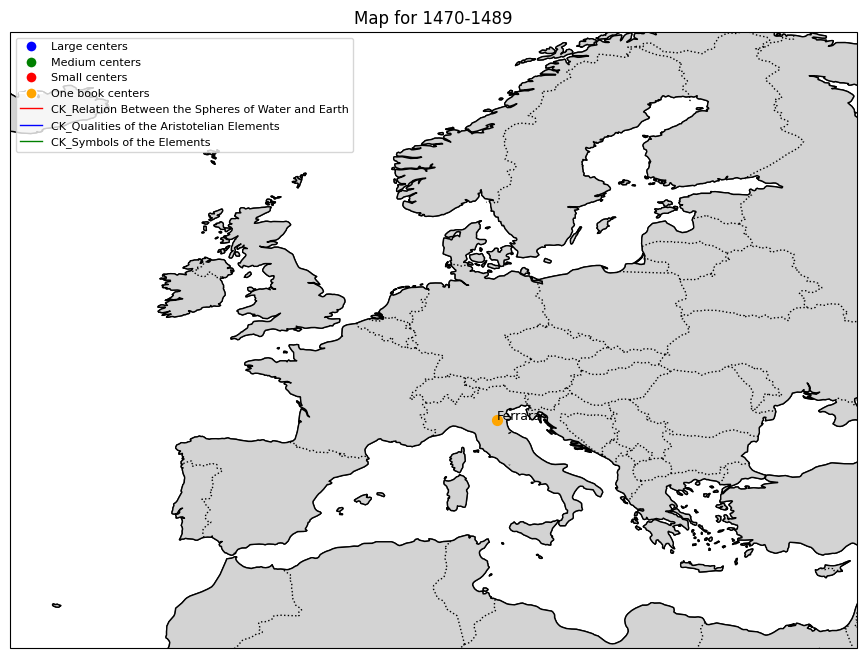

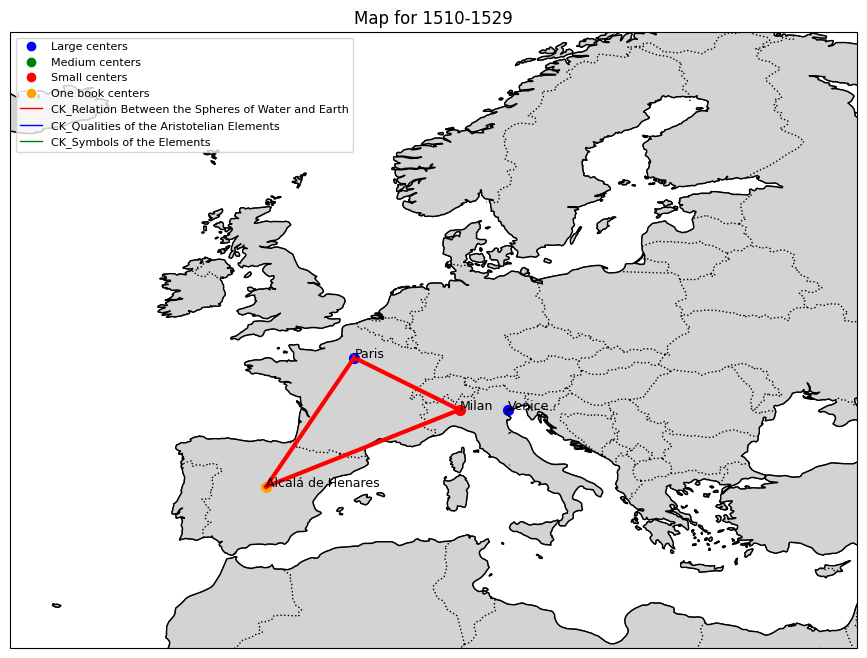

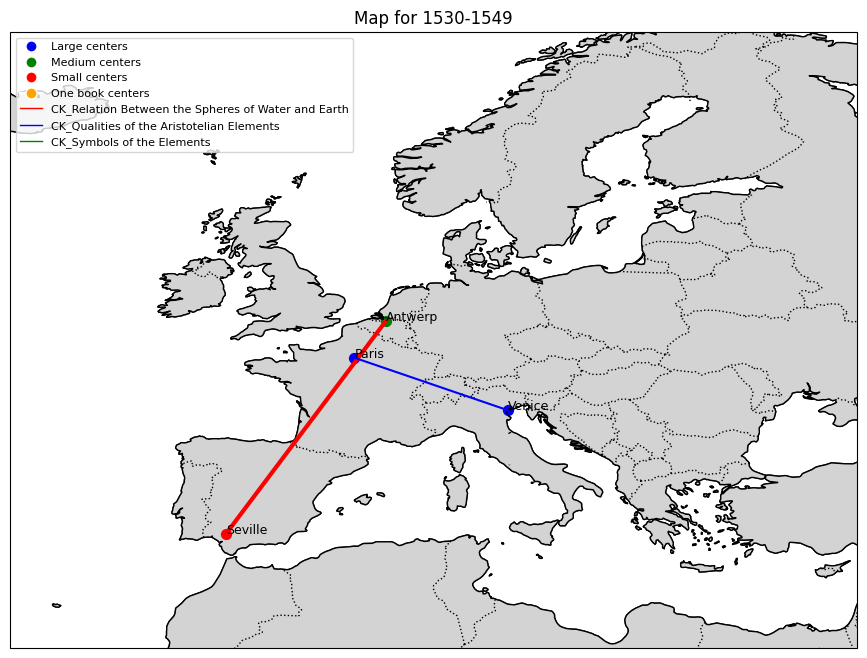

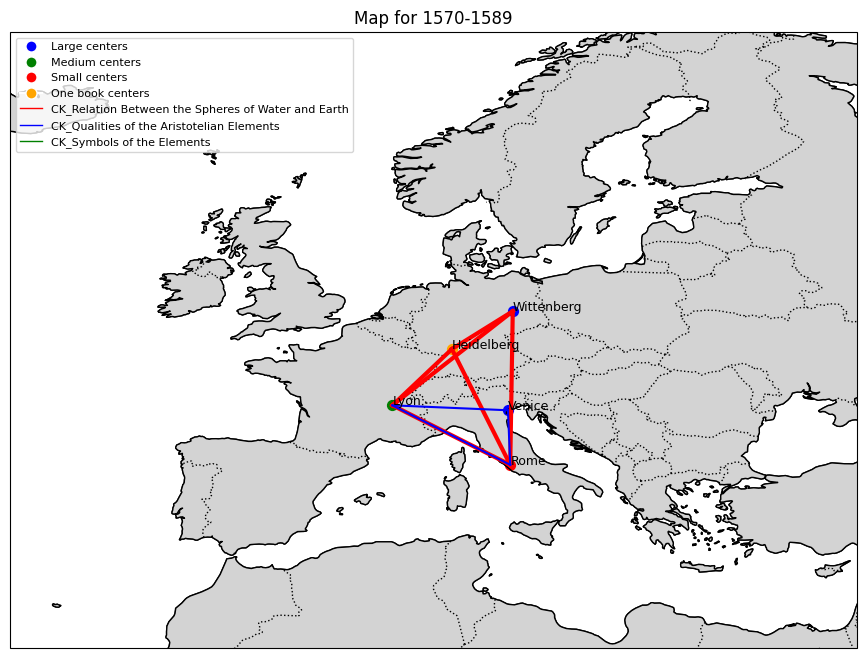

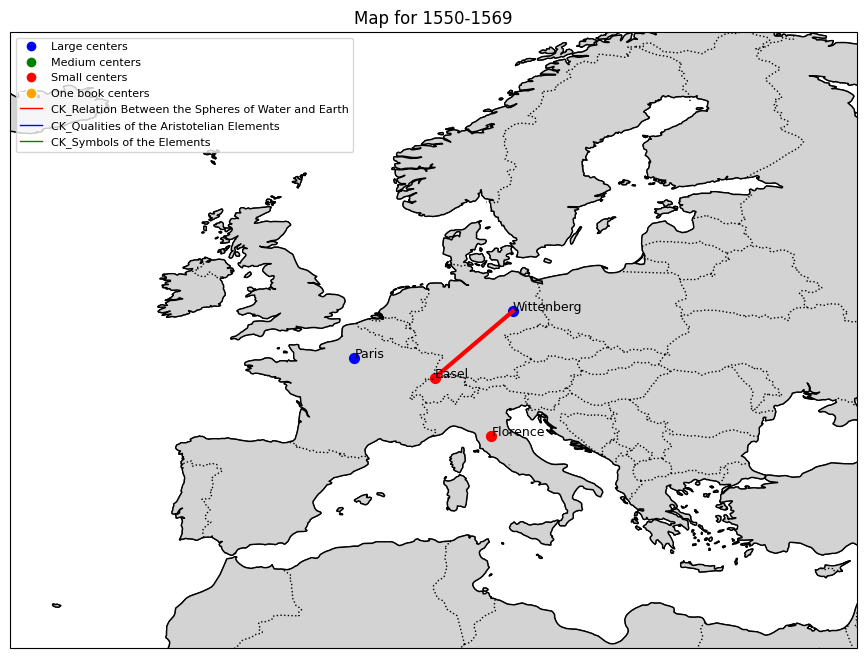

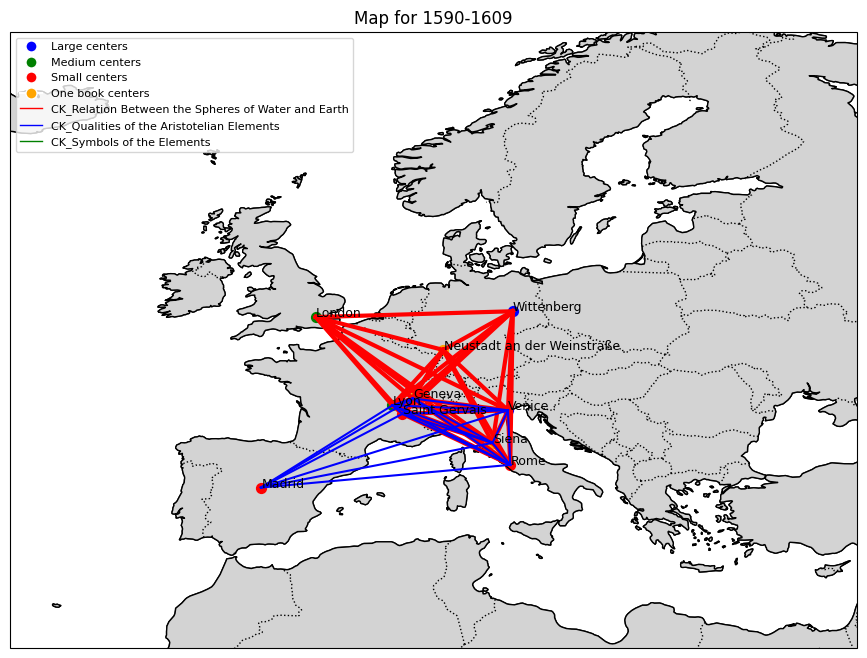

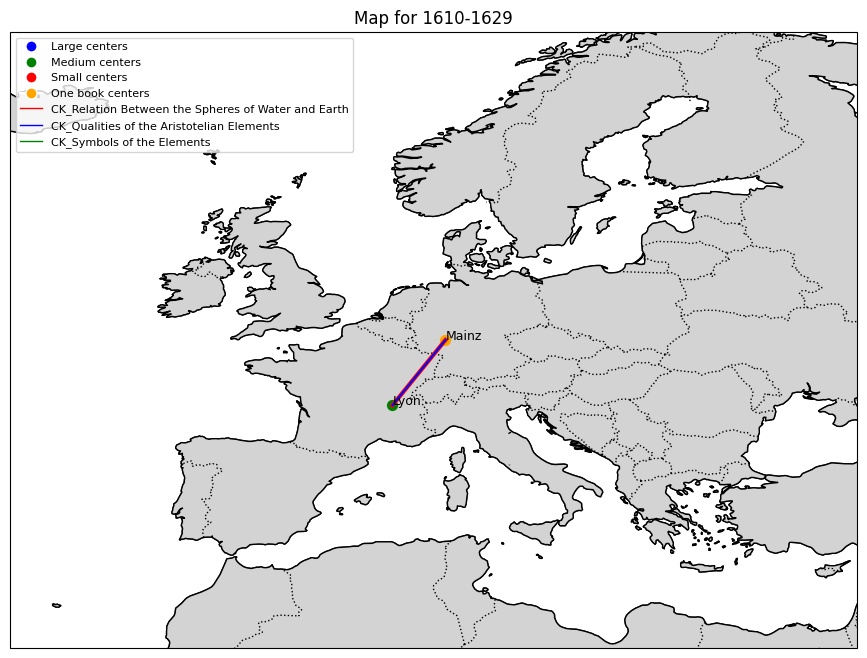

In [101]:
# Loop through all intervals in interval_dfs
for interval_name, df in interval_dfs.items():
    plot_static_map(df, interval_name)

In [95]:
# Filter the DataFrame for rows where the 'cks' column contains 'CK_Symbols of the Elements'
places_with_ck_symbols = sublunar_structure_visual[sublunar_structure_visual['cks'] == 'CK_Symbols of the Elements']

# Group by 'place' and aggregate the unique intervals for each place
place_intervals = places_with_ck_symbols.groupby('place')['interval'].unique()

# Print the unique places along with their associated intervals
for place, intervals in place_intervals.items():
    print(f"Place: {place}, Intervals: {', '.join(intervals)}")


Place: Florence, Intervals: 1550-1569
Place: Venice, Intervals: 1530-1549
